# Table of Content
1. Import libraries and data
2. Security Implications
3. Defining regions to dataframe
4. Creating activity profile
5. Create customers profiles
6. Profiles distribution visualization
7. Aggregate the max, mean, and min variables
8. Compare your customer profiles

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path = r'/Users/CK/Downloads/CF/Instacart Basket Analysis'



## Step 1 - Import Latest InstaCart Merged Data

In [5]:
# Importing merged order customer dataset
df_insta_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_and_order.pkl'))

In [6]:
df_insta_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,both


In [7]:
df_insta_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spender_type', 'order_frequency',
       'frequency_flag', 'first_name', 'surname', 'Gender', 'State', 'Age',
       'date_joined', 'dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [8]:
df_insta_merged.shape

(32404859, 33)

## Step 2 - Consider any Security Implications for this Data

In [9]:
# Drop columns 'first_name' and 'last_name' 
df_insta_merge = df_insta_merged.drop(columns=['first_name', 'surname'])

The dataframe containes some personal data linke family_status, income, dependant data etc. I have removed some unimportant and PII related data like first_name and surname.

##  Step 3 - Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [10]:
# mapping states to regions
# Start by defining a state_to_region_map

state_region_map = {
    'Maine' : 'Northeast',
    'New Hampshire' : 'Northeast',
    'Vermont' : 'Northeast',
    'Massachusetts' : 'Northeast',
    'Rhode Island' : 'Northeast',
    'Connecticut' : 'Northeast',
    'New York' : 'Northeast',
    'Pennsylvania' : 'Northeast',
    'New Jersey' : 'Northeast',
        'Wisconsin' : 'Midwest',
        'Michigan' : 'Midwest',
        'Illinois' : 'Midwest',
        'Indiana' : 'Midwest',
        'Ohio' : 'Midwest',
        'North Dakota' : 'Midwest',
        'South Dakota' : 'Midwest',
        'Nebraska' : 'Midwest',
        'Kansas' : 'Midwest', 
        'Minnesota' : 'Midwest', 
        'Iowa' : 'Midwest',
        'Missouri' : 'Midwest',
            'Delaware' : 'South',
            'Maryland' : 'South',
            'District of Columbia' : 'South',
            'Virginia' : 'South',
            'West Virginia' : 'South',
            'North Carolina' : 'South',
            'South Carolina' : 'South',
            'Georgia' : 'South',
            'Florida' : 'South',
            'Kentucky' : 'South',
            'Tennessee' : 'South',
            'Mississippi' : 'South',
            'Alabama' : 'South',
            'Oklahoma' : 'South',
            'Texas' : 'South',
            'Arkansas' : 'South',
            'Louisiana' : 'South',
                'Idaho' : 'West',
                'Montana' : 'West',
                'Wyoming' : 'West',
                'Nevada' : 'West',
                'Utah' : 'West',
                'Colorado' : 'West',
                'Arizona' : 'West',
                'New Mexico' : 'West',
                'Alaska' : 'West',
                'Washington' : 'West',
                'Oregon' : 'West',
                'California' : 'West',
                'Hawaii' : 'West'
}   

In [11]:
# Check output

print(state_region_map)

{'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast', 'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Color

In [12]:
# Use loc function to create a Region column

df_insta_merge.loc[:, 'Region'] = df_insta_merge['State'].map(state_region_map)

In [13]:
# For Quality Check - make states not listed in map appear as "Other"

df_insta_merge['Region'].fillna('Other', inplace=True)

In [14]:
# Check Output

df_insta_merge['Region'].head()

0    South
1    South
2    South
3    South
4    South
Name: Region, dtype: object

In [15]:
df_insta_merge['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Step 3(B) - Determine Spending Habits by Region


In [16]:
# Create Subset Sample 

# This sample will be 10% of the total amount of records in our df_insta_merge dataframe

##region_sample = df_insta_merge[: 3240485]

In [17]:
# Check Output and Shape

##region_sample.head()

In [18]:
##region_sample.shape

In [19]:
# Check output of spending flag

##region_sample['spender_type'].head()

In [20]:
# Create a Crosstab of Region and Spending Flag

crosstab_region_spend = pd.crosstab(df_insta_merge['Region'], df_insta_merge['spender_type'])

In [21]:
# Check output and shape

crosstab_region_spend.head()

spender_type,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [22]:
crosstab_region_spend.to_clipboard()

In [23]:
# Calculate the total count of customers
crosstab_region_spend['Total'] = crosstab_region_spend['High spender'] + crosstab_region_spend['Low spender']

# Calculate the proportions of high and low spenders
crosstab_region_spend['High Spender Proportion'] = crosstab_region_spend['High spender'] / crosstab_region_spend['Total'] * 100
crosstab_region_spend['Low spender Proportion'] = crosstab_region_spend['Low spender'] / crosstab_region_spend['Total'] * 100

# Sort the DataFrame by 'Total' frequency
crosstab_region_spend = crosstab_region_spend.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
crosstab_region_spend

spender_type,High spender,Low spender,Total,High Spender Proportion,Low spender Proportion
Region,,,,,
South,209691,10582194,10791885,1.943043,98.056957
West,160354,8132559,8292913,1.933627,98.066373
Midwest,155975,7441350,7597325,2.053025,97.946975
Northeast,108225,5614511,5722736,1.891141,98.108859


### Visualization

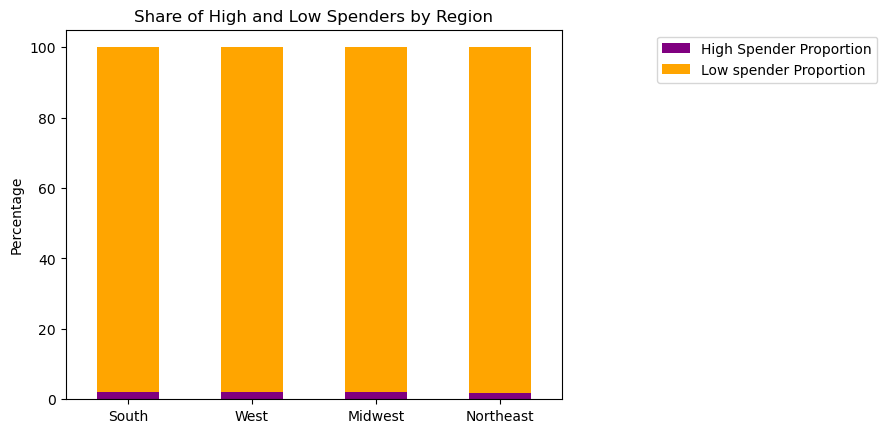

In [24]:
# Plot stacked bars with adjusted parameters
bar_cross_region_spend_relative = crosstab_region_spend[['High Spender Proportion', 'Low spender Proportion']].plot.bar(stacked=True, color=['purple','orange',])

# Set labels and title
plt.title('Share of High and Low Spenders by Region')
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage')


# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.65, 1))


In [25]:
# Export bar chart
bar_cross_region_spend_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10_bar_cross_region_spend_relative.png'), bbox_inches='tight')

1. The total number of spenders are highest in South and lowest in northeast. 
2. Notice that, midwest regions have higher proportion of "High spenders" compared to the other regions.
3. While there are negligible differences in the proportions of high and low spenders by region, the vast majority of customers in all regions are low spenders.

## Q4) Creating a flag for low activity customers

In [26]:
df_insta_merge['max_order'] = df_insta_merge.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/gc/2p45966n07l89n0z72465jy80000gn/T/ipykernel_61197/3261977814.py:1: FutureWarning: The provided callable <function amax at 0x109f09b20> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_insta_merge['max_order'] = df_insta_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [27]:
df_low_activity = df_insta_merge.loc[(df_insta_merge['max_order']< 5)]

In [28]:
# Export df_excluded as "low_activity_excluded.pkl" 
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_excluded.pkl'))

## Q5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependants.

In [29]:
# Check minimum age

df_insta_merge['Age'].min()

18

In [30]:
#Check maximum age 
df_insta_merge['Age'].max()

81

In [31]:
# **All age groups**

# Age group -> 18 to 30 years old

df_insta_merge.loc[(df_insta_merge['Age'] >= 18) & (df_insta_merge['Age'] <= 30), 'age_group'] = '18-30 years old'

# Age group -> 31 to 45 years old

df_insta_merge.loc[(df_insta_merge['Age'] >= 31) & (df_insta_merge['Age'] <= 50), 'age_group'] = '31-50 years old'

# Age group -> 46 to 60
df_insta_merge.loc[(df_insta_merge['Age'] >= 51) & (df_insta_merge['Age'] <= 81), 'age_group'] = '51-81 years old'

# Check output

df_insta_merge['age_group'].value_counts(dropna = False)

age_group
51-81 years old    15642634
31-50 years old    10162866
18-30 years old     6599359
Name: count, dtype: int64

In [32]:
# check minimum income
df_insta_merge['income'].min()


25903

In [33]:
# check maximum income 
df_insta_merge['income'].max()

593901

In [34]:
# Income group under $50K

df_insta_merge.loc[df_insta_merge['income'] < 50000,'income_group'] = 'lower income'

# Income group between $50 and $100K

df_insta_merge.loc[(df_insta_merge['income'] >= 50000) & (df_insta_merge['income'] < 100000),'income_group'] = 'middle income'

# Income group above $100K

df_insta_merge.loc[df_insta_merge['income'] >= 100000, 'income_group'] = 'high income'

# Check output

df_insta_merge['income_group'].value_counts(dropna = False)

income_group
high income      14814766
middle income    13996010
lower income      3594083
Name: count, dtype: int64

In [35]:
# Check minimum dependants
    
df_insta_merge['dependants'].min()

0

In [36]:
# Check maximum dependants
    
df_insta_merge['dependants'].max()

3

In [37]:
# No dependant group

df_insta_merge.loc[df_insta_merge['dependants'] <= 0, 'dependants_group'] = 'no dependants'

# Has dependants

df_insta_merge.loc[df_insta_merge['dependants'] > 0, 'dependants_group'] = 'has dependants'

# Check output

df_insta_merge['dependants_group'].value_counts(dropna = False)

dependants_group
has dependants    24307356
no dependants      8097503
Name: count, dtype: int64

In [38]:
# Checking marital status counts

df_insta_merge['family_status'].value_counts(dropna = False)

family_status
married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: count, dtype: int64

In [39]:
# All orders having purchases from " babies" department would be considered to check for "young parent" status.

In [40]:
# Profile based on age, income, and number of dependants

# Young adult profiles
# Low income young adult w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'low income single young adult w/o dependants'

# Middle income young adult w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old')  & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'middle income single young adult w/o dependants'

# High income young adult w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'high income single young adult w/o dependants'

# Low income young adult with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'low income single young adult with dependants'

# Middle income young adult with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old') & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'middle income single young adult with dependants'

# High income young adult with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '18-30 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'high income single young adult with dependants'

# Middle-aged adult profiles
# Low income Middle-aged w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'low income middle-aged w/o dependants'

# Middle income Middle-aged w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old')  & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'middle income middle-aged w/o dependants'

# High income Middle-aged w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'high income middle-aged w/o dependants'

# Low income Middle-aged with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'low income middle-aged with dependants'

# Middle income Middle-aged with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old') & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'low income middle-aged with dependants'

# High income Middle-aged with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '31-50 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'low income middle-aged with dependants'



In [41]:
# Seniors profiles
# Low income Seniors w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'Low income Seniors w/o dependants'

# Middle income Seniors w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old')  & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'Middle income Seniors w/o dependants'

# High income Seniors w/o dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'no dependants'),'profile']= 'High income Seniors w/o dependants'

# Low income Seniors with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old') & (df_insta_merge['income_group']=='lower income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'Low income Seniors with dependants'

# Middle income Seniors with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old') & (df_insta_merge['income_group']=='middle income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'Middle income Seniors with dependants'

# High income Seniors with dependants

df_insta_merge.loc[(df_insta_merge['age_group']== '51-81 years old') & (df_insta_merge['income_group']=='high income') & (df_insta_merge['dependants_group'] == 'has dependants'),'profile']= 'High income Seniors w/o dependants'



In [42]:

df_insta_merge['profile'].value_counts(dropna = False)


profile
High income Seniors w/o dependants                  10881386
low income middle-aged with dependants               7647337
middle income single young adult with dependants     4034045
Middle income Seniors with dependants                2557197
middle income single young adult w/o dependants      1318013
middle income middle-aged w/o dependants             1299674
Low income Seniors with dependants                   1015832
high income middle-aged w/o dependants                917636
Middle income Seniors w/o dependants                  855793
low income single young adult with dependants         769965
Low income Seniors w/o dependants                     332426
low income middle-aged w/o dependants                 298219
low income single young adult w/o dependants          273309
high income single young adult with dependants        151060
high income single young adult w/o dependants          52967
Name: count, dtype: int64

## Creating visualizations for profiles

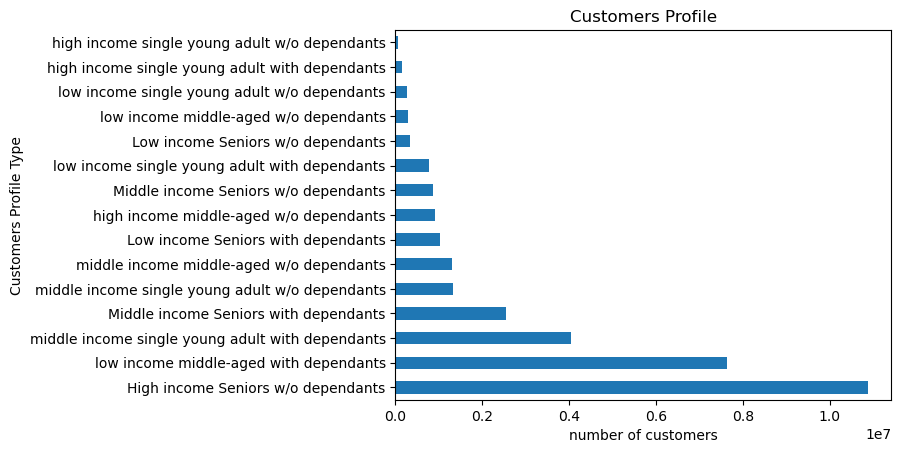

In [43]:
# Bar graph showing customer profile counts

bar_profile = df_insta_merge['profile'].value_counts(dropna = False).plot.barh(title = 'Customers Profile', xlabel = "number of customers", ylabel = 'Customers Profile Type')


Comment:
As shown above, high income senior w/o dependants is the largest share of customer profile. Also, high income single young adult w/o dependants is the lowest share , perhpas because this group eats outside most of the times and donot order grocery much.

In [44]:
# Exporting bar chart 'Customers Profile Type'

bar_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profiles.png'))

## # Q7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [45]:
df_insta_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spender_type', 'order_frequency',
       'frequency_flag', 'Gender', 'State', 'Age', 'date_joined', 'dependants',
       'family_status', 'income', '_merge', 'Region', 'age_group',
       'income_group', 'dependants_group', 'profile'],
      dtype='object')

In [46]:
## Aggregation
df_insta_merge.groupby('profile')[['days_since_prior_order','prices']].agg(['min','max','mean'])

days_since_prior_order        \
                                                                    min   max   
profile                                                                         
High income Seniors w/o dependants                                  0.0  30.0   
Low income Seniors w/o dependants                                   0.0  30.0   
Low income Seniors with dependants                                  0.0  30.0   
Middle income Seniors w/o dependants                                0.0  30.0   
Middle income Seniors with dependants                               0.0  30.0   
high income middle-aged w/o dependants                              0.0  30.0   
high income single young adult w/o dependants                       0.0  30.0   
high income single young adult with dependants                      0.0  30.0   
low income middle-aged w/o dependants                               0.0  30.0   
low income middle-aged with dependants                              0.0  30.0   
low income single young adult w/o dependants                        0.0  30.0   
low income single young adult with dependants                       0.0  30.0   
middle income middle-aged w/o dependants                            0.0  30.0   
middle income single young adult w/o dependants                     0.0  30.0   
middle income single young adult with dependants                    0.0  30.0   

                                                            prices           \
                                                       mean    min      max   
profile                                                                       
High income Seniors w/o dependants                11.043960    1.0  99999.0   
Low income Seniors w/o dependants                 11.362008    1.0     25.0   
Low income Seniors with dependants                11.478525    1.0     25.0   
Middle income Seniors w/o dependants              11.109274    1.0  99999.0   
Middle income Seniors with dependants             11.167341    1.0  99999.0   
high income middle-aged w/o dependants            11.066040    1.0  99999.0   
high income single young adult w/o dependants     10.664754    1.0  99999.0   
high income single young adult with dependants    11.114591    1.0  99999.0   
low income middle-aged w/o dependants             11.663933    1.0     25.0   
low income middle-aged with dependants            11.074753    1.0  99999.0   
low income single young adult w/o dependants      11.527550    1.0     25.0   
low income single young adult with dependants     11.653534    1.0     25.0   
middle income middle-aged w/o dependants          11.040894    1.0  99999.0   
middle income single young adult w/o dependants   11.181723    1.0  99999.0   
middle income single young adult with dependants  11.002255    1.0  99999.0   

                                                              
                                                        mean  
profile                                                       
High income Seniors w/o dependants                 13.573091  
Low income Seniors w/o dependants                   6.505766  
Low income Seniors with dependants                  6.501492  
Middle income Seniors w/o dependants                8.219400  
Middle income Seniors with dependants               8.718535  
high income middle-aged w/o dependants             20.784206  
high income single young adult w/o dependants     143.357930  
high income single young adult with dependants    128.077454  
low income middle-aged w/o dependants               6.750468  
low income middle-aged with dependants             11.854904  
low income single young adult w/o dependants        6.893850  
low income single young adult with dependants       6.876916  
middle income middle-aged w/o dependants            8.538568  
middle income single young adult w/o dependants     8.296636  
middle income single young adult with dependants    8.559937

In [47]:
df_profile_aov= df_insta_merge.groupby('profile')['prices'].mean()

In [48]:
df_insta_merge.groupby('profile')['prices'].mean()

profile
High income Seniors w/o dependants                   13.573091
Low income Seniors w/o dependants                     6.505766
Low income Seniors with dependants                    6.501492
Middle income Seniors w/o dependants                  8.219400
Middle income Seniors with dependants                 8.718535
high income middle-aged w/o dependants               20.784206
high income single young adult w/o dependants       143.357930
high income single young adult with dependants      128.077454
low income middle-aged w/o dependants                 6.750468
low income middle-aged with dependants               11.854904
low income single young adult w/o dependants          6.893850
low income single young adult with dependants         6.876916
middle income middle-aged w/o dependants              8.538568
middle income single young adult w/o dependants       8.296636
middle income single young adult with dependants      8.559937
Name: prices, dtype: float64

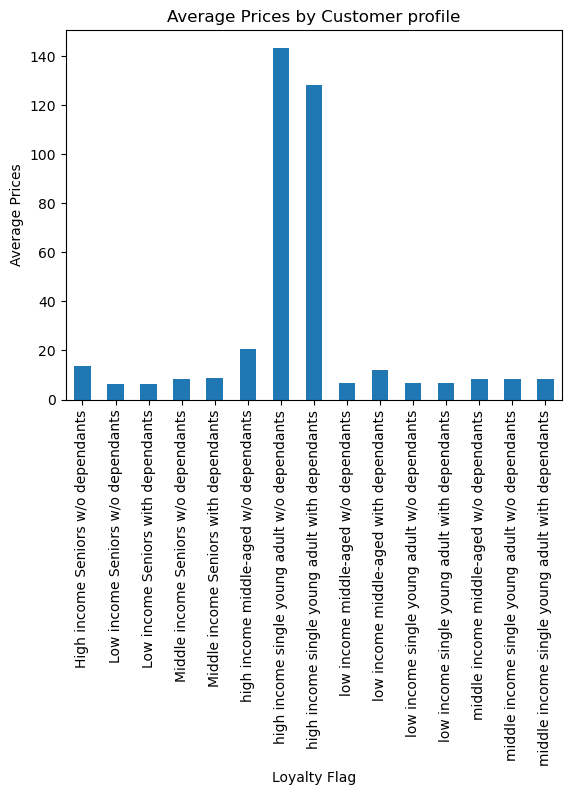

In [49]:
df_bar_profile_aov= df_profile_aov.plot(kind='bar', x='profile', y='prices')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Prices')
plt.title('Average Prices by Customer profile')
plt.show()

Comments:
The above visualization shows the average order value for each of the customer profile. It is clear that "High Income Single Young Adult W/O dependants have the highest order value.

In [50]:
# Exporting the bar chart
df_bar_profile_aov.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'aov_by_profile.png'))

## Q8) Compare your customer profiles with regions and departments

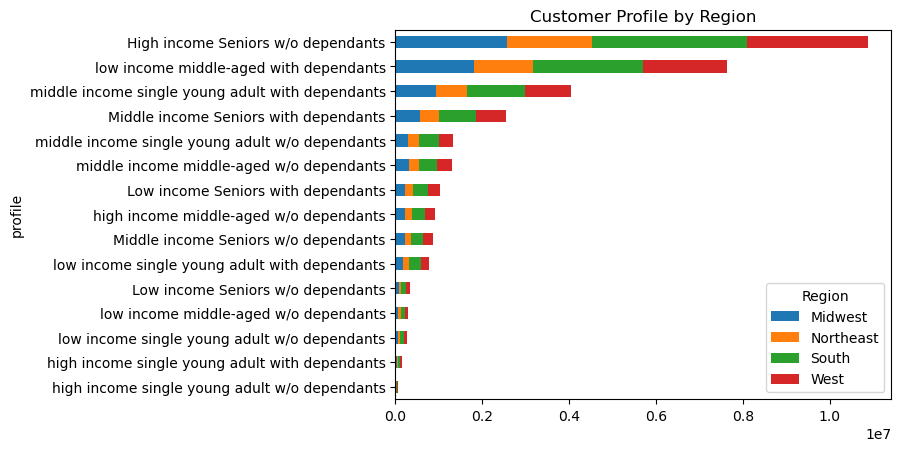

In [51]:
# Group by customer 'profile' and 'region'

customers_profile_region = df_insta_merge.groupby(['profile','Region']).size().unstack()

# Sort

customers_profile_region = customers_profile_region.loc[customers_profile_region.sum(axis=1).sort_values(ascending = True).index]

# Create bar chart

customers_profile_region = customers_profile_region.plot.barh(stacked = True, title ='Customer Profile by Region')

Comments:
The visualization shows the share of region in every customer profile.
As per the visualization, west and south has higher share in most of the profile groups.

In [52]:
# Exporting Customer bar chart 'Customer Profile by Region'

customers_profile_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_by_region.png'))

In [55]:
# Import dataframe 'departments_wrangled'

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [56]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Text(0, 0.5, 'Department')

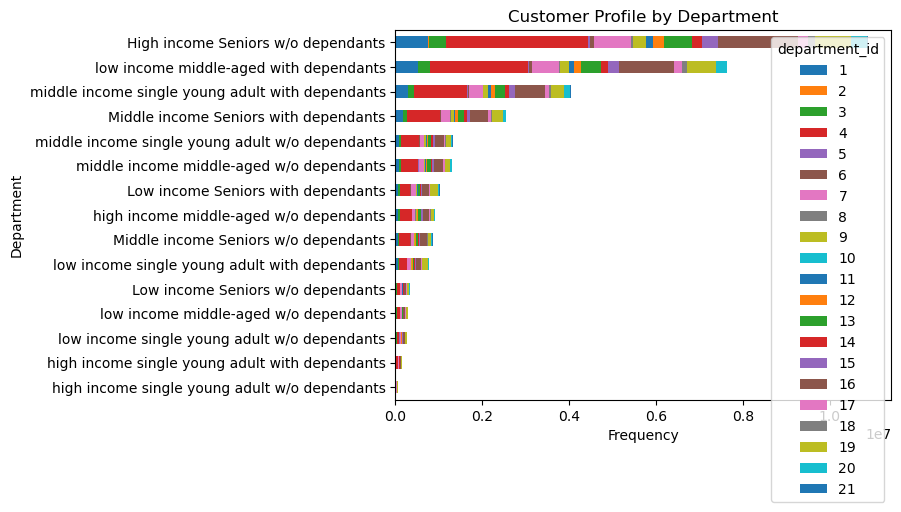

In [53]:
# Group by 'customer profile' and 'department'

customers_profile_department = df_insta_merge.groupby(['profile','department_id']).size().unstack()

# Sort

customers_profile_department = customers_profile_department.loc[customers_profile_department.sum(axis = 1).sort_values(ascending = True).index]

# Create bar chart

customers_profile_department = customers_profile_department.plot.barh(stacked = True, title = 'Customer Profile by Department')

# X-Axis Label

plt.xlabel('Frequency')

# Y-Axis Label

plt.ylabel('Department')

Comments:
The visualization shows the department wise share in each of the customer profile. 
As per visualization, 4 and 6, i.e Alcohol and beverage, has the highest share in all custmer profile groups broadly.


In [ ]:
# Exporting 'Customer Profile ' by 'department'

customers_profile_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_profile_by_department.png'))

In [ ]:
# Exporting 'final_merge' in a PKL format

df_insta_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_merge.pkl'))

## Other visualizations
